#Importação das Bibliotecas

In [2]:
# Bibliotecas a serem utilizadas:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

#Carregar Dataset

In [3]:
# Carregar dataset
df = pd.read_csv('ifood-restaurants-february-2021.csv')

#Manipulação e Limpeza dos dados

In [4]:
# Passar títulos para português com letra minuscula.
df = df.rename(columns={
    'availableForScheduling': 'disponivel_para_agendamento',
    'avatar': 'avatar',
    'category': 'categoria',
    'delivery_fee': 'taxa_de_entrega',
    'delivery_time': 'tempo_de_entrega',
    'distance': 'distancia',
    'ibge': 'ibge',
    'minimumOrderValue': 'valor_minimo_do_pedido',
    'name': 'nome',
    'paymentCodes': 'codigos_de_pagamento',
    'price_range': 'faixa_de_preco',
    'classificação': 'classificacao',
    'rating': 'avaliacao',
    'tags': 'tags',
    'url': 'url'
})


In [5]:
# Informações de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   disponivel_para_agendamento  406399 non-null  bool   
 1   avatar                       406122 non-null  object 
 2   categoria                    406399 non-null  object 
 3   taxa_de_entrega              406399 non-null  float64
 4   tempo_de_entrega             406399 non-null  int64  
 5   distancia                    406399 non-null  float64
 6   ibge                         406399 non-null  int64  
 7   valor_minimo_do_pedido       406399 non-null  float64
 8   nome                         406399 non-null  object 
 9   codigos_de_pagamento         406397 non-null  object 
 10  faixa_de_preco               406399 non-null  object 
 11  avaliacao                    406399 non-null  float64
 12  tags                         406399 non-null  object 
 13 

In [6]:
# Verificar linhas duplicados
print('Total valores duplicados:',df.duplicated().sum())

Total valores duplicados: 0


In [7]:
# Remove linhas com valores ausentes no DataFrame
df.dropna(inplace=True)

#Hipótese 1:
## Capitais do país tem mais pedido

In [8]:
# URL do site
url = "https://www.ibge.gov.br/explica/codigos-dos-municipios.php"

# Fazer a requisição HTTP para obter o conteúdo da página
response = requests.get(url)

# Verificar se a requisição foi bem-sucedida
if response.status_code == 200:
    # Analisar o conteúdo HTML com BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Remover o span com a classe 'saiba-mais-tag'
    for span in soup.find_all('span', class_='saiba-mais-tag'):
        span.decompose()  # Remove o elemento do HTML

    # Inicializar uma lista para armazenar os dados
    dados = []

    # Encontrar a tabela que contém os dados
    tables = soup.find_all('table')

    if tables:
        table = tables[0]  # Usar a primeira tabela como exemplo

        # Processar todas as linhas da tabela
        for row in table.find_all('tr'):
            # Para cada linha, obter as células
            cols = row.find_all('td')
            # Extrair os textos das células
            cols = [col.text.strip() for col in cols]

            # Se a linha contém dados válidos, adicioná-los à lista
            if len(cols) == 2:
                dados.append(cols)

    # Criar um DataFrame com as colunas 'estado' e 'cod_estado'
    estados = pd.DataFrame(dados, columns=['estado', 'cod_estado'])

    # Converter a coluna 'cod_estado' para o tipo numérico
    estados['cod_estado'] = pd.to_numeric(estados['cod_estado'])

    # Exibir o DataFrame
    print(estados)

else:
    print(f"Falha na requisição. Código de status: {response.status_code}")


                 estado  cod_estado
0                  Acre          12
1               Alagoas          27
2                 Amapá          16
3              Amazonas          13
4                 Bahia          29
5                 Ceará          23
6      Distrito Federal          53
7        Espírito Santo          32
8                 Goiás          52
9              Maranhão          21
10          Mato Grosso          51
11   Mato Grosso do Sul          50
12         Minas Gerais          31
13                 Pará          15
14              Paraíba          25
15               Paraná          41
16           Pernambuco          26
17                Piauí          22
18  Rio Grande do Norte          24
19    Rio Grande do Sul          43
20       Rio de Janeiro          33
21             Rondônia          11
22              Roraima          14
23       Santa Catarina          42
24            São Paulo          35
25              Sergipe          28
26            Tocantins     

In [9]:
# Exibe informações do DataFrame 'estados'
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estado      27 non-null     object
 1   cod_estado  27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 564.0+ bytes


In [10]:
# URL do site
url = "https://www.ibge.gov.br/explica/codigos-dos-municipios.php"

# Fazer a requisição HTTP para obter o conteúdo da página
response = requests.get(url)

# Verificar se a requisição foi bem-sucedida
if response.status_code == 200:
    # Analisar o conteúdo HTML com BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Remover o span com a classe 'saiba-mais-tag'
    for span in soup.find_all('span', class_='saiba-mais-tag'):
        span.decompose()  # Remove o elemento do HTML

    # Inicializar uma lista para armazenar os dados
    municipios_dados = []

    # Encontrar todos os links que contêm os municípios
    municipios = soup.find_all('a', href=True)

    for municipio in municipios:
        # Pegar o nome do município (texto do link)
        nome_municipio = municipio.text.strip()

        # Verificar se o link contém um código de município na URL
        href = municipio['href']
        if "c=" in href:
            # Extrair o código do município da URL (tudo após 'c=')
            cod_municipio = href.split("c=")[-1]
            # Adicionar os dados à lista
            municipios_dados.append([nome_municipio, cod_municipio])

    # Criar um DataFrame com as colunas 'municipio' e 'cod_municipio'
    municipios_df = pd.DataFrame(municipios_dados, columns=['municipio', 'cod_municipio'])

    # Exibir o DataFrame
    print(municipios_df)

else:
    print(f"Falha na requisição. Código de status: {response.status_code}")


           municipio cod_municipio
0         Acrelândia       1200013
1       Assis Brasil       1200054
2          Brasiléia       1200104
3             Bujari       1200138
4           Capixaba       1200179
...              ...           ...
5565  Tocantinópolis       1721208
5566        Tupirama       1721257
5567      Tupiratins       1721307
5568    Wanderlândia       1722081
5569         Xambioá       1722107

[5570 rows x 2 columns]


In [11]:
# Exibe informações do DataFrame 'municipios_df'
municipios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   municipio      5570 non-null   object
 1   cod_municipio  5570 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
# Criar uma nova coluna 'cod_estado_municipio' em 'municipios_df' com os dois primeiros dígitos de 'cod_municipio'
municipios_df['cod_estado_municipio'] = municipios_df['cod_municipio'].str[:2]

# Converter a nova coluna para numérico para facilitar a junção
municipios_df['cod_estado_municipio'] = pd.to_numeric(municipios_df['cod_estado_municipio'])

# Converte a coluna cod_municipio para numérico
municipios_df['cod_municipio'] = pd.to_numeric(municipios_df['cod_municipio'])

# Realizar a junção dos DataFrames com base em 'cod_estado' (de 'estados') e 'cod_estado_municipio' (de 'municipios_df')
df_completo = pd.merge(municipios_df, estados, left_on='cod_estado_municipio', right_on='cod_estado', how='left')

# Exibir o DataFrame resultante
df_completo.head()


,municipio,cod_municipio,cod_estado_municipio,estado,cod_estado
0,Acrelândia,1200013,12,Acre,12
1,Assis Brasil,1200054,12,Acre,12
2,Brasiléia,1200104,12,Acre,12
3,Bujari,1200138,12,Acre,12
4,Capixaba,1200179,12,Acre,12


In [13]:
# Realiza a junção final entre 'df' e 'df_completo' com base nos códigos de município
df = pd.merge(df, df_completo, left_on='ibge', right_on='cod_municipio', how='left')

In [14]:
# Obtém os 10 municípios mais frequentes no dataset
aux1 = df.municipio.value_counts().reset_index().head(10)
aux1

,municipio,count
0,São Paulo,31563
1,Rio de Janeiro,14599
2,Belo Horizonte,11191
3,Guarulhos,11023
4,Duque de Caxias,10000
5,Osasco,9438
6,São Gonçalo,7985
7,São Bernardo do Campo,7715
8,Goiânia,7700
9,Contagem,7591


In [15]:
# Lista de capitais do Brasil
lista_capitais = [
"Rio Branco", "Maceió", "Macapá", "Manaus", "Salvador", "Fortaleza", "Brasília", "Vitória", "Goiânia", "São Luís",
"Cuiabá", "Campo Grande", "Belo Horizonte", "Belém", "João Pessoa", "Curitiba", "Recife", "Teresina", "Rio de Janeiro",
"Natal", "Porto Alegre", "Porto Velho", "Boa Vista", "Florianópolis", "São Paulo", "Aracaju", "Palmas"
 ]
# Verifica se os municípios mais frequentes estão na lista de capitais
aux1.municipio.isin(lista_capitais).value_counts().reset_index()


,municipio,count
0,False,6
1,True,4


###A Hipótese 1 é parcialmente verdadeira. As capitais, como São Paulo, Rio de Janeiro, Belo Horizonte, e Goiânia, estão entre as cidades com mais pedidos, validando a hipótese de que capitais concentram um grande número de pedidos.

###No entanto, cidades não capitais como Guarulhos, Duque de Caxias, e Osasco também aparecem no ranking com números expressivos, sugerindo que, além das capitais, cidades grandes nas regiões metropolitanas também possuem uma demanda significativa.

#Hipótese 2:
##Categorias de restaurantes mais populares (como Lanche e Brasileira) têm tempos de entrega mais rápidos


In [16]:
# Usando apenas um groupby para contar as categorias e calcular o tempo médio de entrega
top_categorias = df.groupby('categoria').agg(
    contagem=('categoria', 'size'),
    tempo_medio_entrega=('tempo_de_entrega', 'mean')
).reset_index()

# Selecionar as 10 principais categorias com base na contagem
top_categorias = top_categorias.nlargest(10, 'contagem')

round(top_categorias,0)


,categoria,contagem,tempo_medio_entrega
31,Lanches,98896,49.0
7,Brasileira,73256,46.0
20,Doces & Bolos,39816,46.0
45,Pizza,36805,50.0
4,Açaí,22104,45.0
32,Marmita,16550,47.0
30,Japonesa,14139,51.0
6,Bebidas,13369,44.0
49,Saudável,10029,46.0
48,Salgados,9664,47.0


In [17]:
# Agrupa o DataFrame por categoria e calcula a média do tempo de entrega, ordenando as categorias com os menores tempos
aux2 = df.groupby('categoria')['tempo_de_entrega'].mean().reset_index().sort_values(by = 'tempo_de_entrega').head(10)
aux2

,categoria,tempo_de_entrega
33,Marroquina,24.000000
41,Paranaense,35.000000
51,Sorvetes,38.514419
10,Casa de Sucos,38.635854
17,Coreana,40.578125
8,Cafeteria,40.648467
39,Padaria,41.149571
54,Típica do Norte,41.258065
2,Argentina,43.176471
57,Vegetariana,43.680000


In [18]:
df.tempo_de_entrega.mean()

47.4340859844381

In [19]:
# Verifica se as categorias mais populares estão entre as com menor tempo de entrega
top_categorias.categoria.isin(aux2.categoria).value_counts().reset_index()


,categoria,count
0,False,10


###A Hipótese 2 é refutada. As categorias mais populares, como Lanches e Brasileira, apesar de terem o maior número de pedidos, não estão entre as categorias com os menores tempos de entrega. As categorias com os tempos de entrega mais rápidos, como Marroquina e Paranaense, são muito menos populares.

###Isso sugere que a popularidade de uma categoria não está necessariamente relacionada a tempos de entrega mais rápidos. Pode ser que a logística de categorias muito demandadas, como Lanches e Brasileira, seja mais complexa, resultando em tempos de entrega mais longos devido à alta demanda.

#Hipótese 3:
##Restaurantes com uma faixa de preço maior e com tempo de entrega mais rápido têm uma avaliação melhor, independentemente da categoria.


In [20]:
# Seleciona as colunas 'faixa_de_preco', 'tempo_de_entrega' e 'avaliacao' do DataFrame
aux3 = df[['faixa_de_preco', 'tempo_de_entrega', 'avaliacao']]
aux3

,faixa_de_preco,tempo_de_entrega,avaliacao
0,CHEAPEST,27,0.00000
1,CHEAPEST,61,0.00000
2,MODERATE,70,0.00000
3,CHEAPEST,63,0.00000
4,CHEAPEST,58,0.00000
...,...,...,...
406115,CHEAPEST,60,4.95000
406116,CHEAPEST,50,0.00000
406117,CHEAPEST,40,4.46602
406118,CHEAPEST,60,5.00000


In [21]:
# Agrupa os dados por faixa de preço e calcula as médias de tempo de entrega e avaliação
aux4 = aux3.groupby('faixa_de_preco')[[ 'tempo_de_entrega', 'avaliacao' ]].mean().reset_index().sort_values(by = 'avaliacao', ascending=False)
round(aux4,1)

,faixa_de_preco,tempo_de_entrega,avaliacao
4,MOST_EXPENSIVE,48.1,4.1
2,EXPENSIVE,46.8,3.8
3,MODERATE,47.1,3.7
0,CHEAP,47.0,3.3
1,CHEAPEST,47.6,2.1


In [22]:
# Calcula a diferença de tempo de entrega entre as faixas de preço
aux4.tempo_de_entrega.diff()

4         NaN
2   -1.303843
3    0.222448
0   -0.075423
1    0.579896
Name: tempo_de_entrega, dtype: float64

###A Hipótese 3 é parcialmente refutada. Embora restaurantes com uma faixa de preço maior realmente tenham melhores avaliações, o tempo de entrega não é um fator determinante nessa relação. Restaurantes mais caros conseguem avaliações melhores mesmo com um tempo de entrega igual aos demais. Portanto, parece que a qualidade percebida pelos clientes, refletida pelo preço, é mais importante para a avaliação do que a rapidez da entrega.

#Hipótese 4:
##Restaurantes que estão mais distantes, possuem avaliações mais altas e cobram maiores taxas de entrega compensam o tempo de entrega mais longo com um melhor serviço.


In [23]:
# Seleciona as colunas 'distancia', 'avaliacao', 'taxa_de_entrega', 'faixa_de_preco', 'tempo_de_entrega'
aux5 = df[['distancia', 'avaliacao', 'taxa_de_entrega','faixa_de_preco', 'tempo_de_entrega']]
aux5

,distancia,avaliacao,taxa_de_entrega,faixa_de_preco,tempo_de_entrega
0,1.22,0.00000,3.99,CHEAPEST,27
1,4.96,0.00000,7.99,CHEAPEST,61
2,8.35,0.00000,11.99,MODERATE,70
3,6.35,0.00000,16.49,CHEAPEST,63
4,5.22,0.00000,11.99,CHEAPEST,58
...,...,...,...,...,...
406115,3.53,4.95000,9.00,CHEAPEST,60
406116,2.60,0.00000,6.00,CHEAPEST,50
406117,3.61,4.46602,0.00,CHEAPEST,40
406118,3.54,5.00000,8.00,CHEAPEST,60


In [24]:
# Agrupa os dados por faixa de preço e calcula as médias de distância, avaliação, taxa de entrega e tempo de entrega
round(aux5.groupby('faixa_de_preco')[['distancia', 'avaliacao', 'taxa_de_entrega', 'tempo_de_entrega']].mean().reset_index().sort_values(by = 'avaliacao', ascending=False),1)

,faixa_de_preco,distancia,avaliacao,taxa_de_entrega,tempo_de_entrega
4,MOST_EXPENSIVE,4.3,4.1,9.7,48.1
2,EXPENSIVE,3.5,3.8,8.0,46.8
3,MODERATE,3.6,3.7,7.0,47.1
0,CHEAP,4.0,3.3,6.4,47.0
1,CHEAPEST,4.4,2.1,6.7,47.6


In [25]:
# Calcula a média da avaliação no DataFrame 'df'
round(df.avaliacao.mean(),1)

2.5

In [26]:
# Calcula o valor médio da taxa de entrega
aux5.taxa_de_entrega.mean()

6.804475795331429

###A análise sugere que restaurantes mais caros e distantes (como os da faixa "MOST_EXPENSIVE") conseguem compensar o tempo e a distância com uma avaliação melhor. No entanto, essa compensação não é verdadeira para todos os restaurantes distantes. Restaurantes mais baratos e distantes (como os da faixa "CHEAPEST") não conseguem garantir avaliações altas, mesmo cobrando taxas de entrega abaixa do valor médio.

###Portanto, a hipótese se aplica parcialmente, pois depende da faixa de preço do restaurante. Restaurantes premium podem compensar o tempo e a distância com um melhor serviço, enquanto restaurantes mais baratos não conseguem garantir essa percepção positiva.

#Hipótese 5:
##Restaurantes que oferecem opções de pagamento mais variadas atraem avaliações de clientes mais altas.


In [27]:
# Cria uma nova coluna que conta a quantidade de opções de pagamento oferecidas por restaurante
df['quantidade_codigos_de_pagamentos'] = df['codigos_de_pagamento'].apply(lambda x: len(x.split(' $$ ')) if ' $$ ' in x else 1)

In [28]:
# Agrupa os dados por quantidade de opções de pagamento e calcula a média de avaliação
aux6 = df.groupby('quantidade_codigos_de_pagamentos')['avaliacao'].mean().reset_index().sort_values(by = 'avaliacao', ascending=False)
aux6

,quantidade_codigos_de_pagamentos,avaliacao
12,18,4.411286
56,62,4.373636
54,60,4.139065
11,17,4.137255
45,51,3.896042
44,50,3.894311
57,63,3.862160
43,49,3.853461
42,48,3.844092
9,15,3.814745


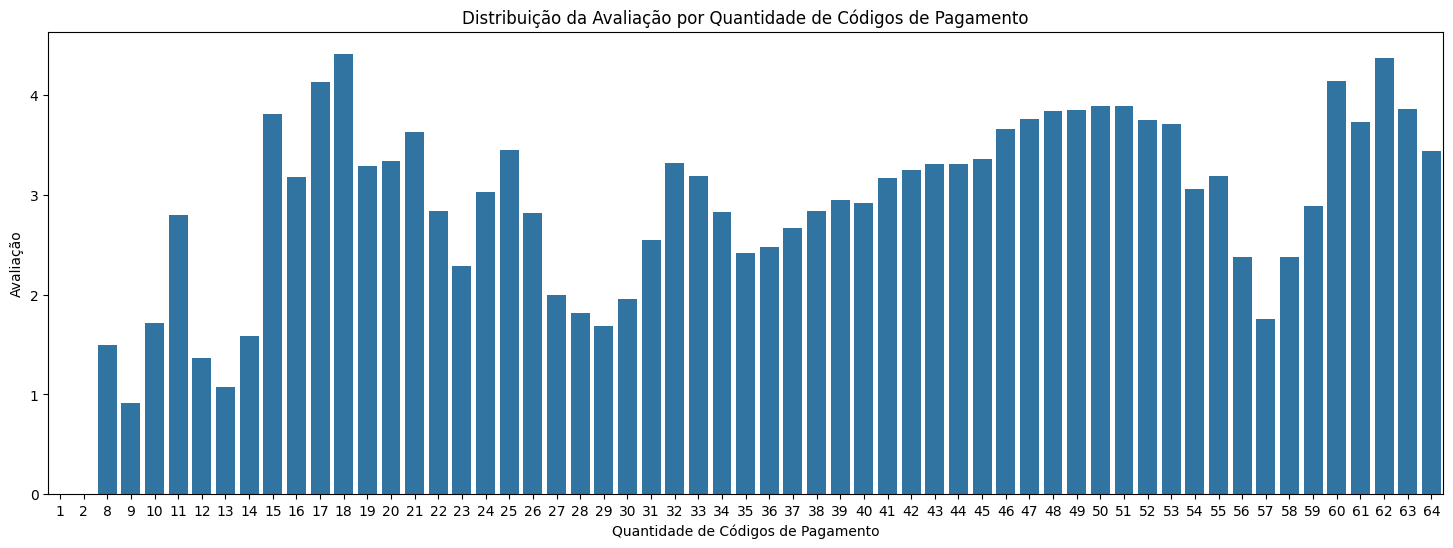

In [29]:
# Exibe gráfico da relação entre quantidade de opções de pagamento e a avaliação
plt.figure(figsize=(18, 6))
sns.barplot(data = aux6, x = 'quantidade_codigos_de_pagamentos', y = 'avaliacao')
plt.xlabel('Quantidade de Códigos de Pagamento')
plt.ylabel('Avaliação')
plt.title('Distribuição da Avaliação por Quantidade de Códigos de Pagamento')
plt.show()

In [30]:
# Filtra os dados para obter apenas os restaurantes com quantidade de opções de pagamento acima da média
aux7 = aux6[aux6['quantidade_codigos_de_pagamentos'] > aux6['quantidade_codigos_de_pagamentos'].mean()]
aux7

,quantidade_codigos_de_pagamentos,avaliacao
56,62,4.373636
54,60,4.139065
45,51,3.896042
44,50,3.894311
57,63,3.862160
43,49,3.853461
42,48,3.844092
41,47,3.763162
46,52,3.756674
55,61,3.729058


In [31]:
# Calcula a porcentagem de restaurantes com mais opções de pagamento acima da média
(len(aux7)/len(aux6))*100

50.847457627118644

In [32]:
# Calcular a porcentagem acumulada
aux6['avaliacao_acumulada'] = aux6['avaliacao'].cumsum() / aux6['avaliacao'].sum()
aux6_pareto = aux6[aux6['avaliacao_acumulada'] <= 0.80]
# Mostrar o resultado
print(aux6_pareto[['quantidade_codigos_de_pagamentos', 'avaliacao', 'avaliacao_acumulada']])

# Exibir o número de códigos de pagamento relevantes para o pareto
num_codigos_relevantes = len(aux6_pareto)
print(f"\nNúmero de códigos de pagamentos relevantes (80% impacto): {num_codigos_relevantes}")

    quantidade_codigos_de_pagamentos  avaliacao  avaliacao_acumulada
12                                18   4.411286             0.026131
56                                62   4.373636             0.052040
54                                60   4.139065             0.076559
11                                17   4.137255             0.101067
45                                51   3.896042             0.124146
44                                50   3.894311             0.147215
57                                63   3.862160             0.170094
43                                49   3.853461             0.192921
42                                48   3.844092             0.215693
9                                 15   3.814745             0.238290
41                                47   3.763162             0.260582
46                                52   3.756674             0.282836
55                                61   3.729058             0.304926
47                                

In [33]:
aux6

,quantidade_codigos_de_pagamentos,avaliacao,avaliacao_acumulada
12,18,4.411286,0.026131
56,62,4.373636,0.052040
54,60,4.139065,0.076559
11,17,4.137255,0.101067
45,51,3.896042,0.124146
44,50,3.894311,0.147215
57,63,3.862160,0.170094
43,49,3.853461,0.192921
42,48,3.844092,0.215693
9,15,3.814745,0.238290


### A Hipótese 5 é parcialmente verdadeira, mas com algumas nuances importantes, conforme identificado na análise de Pareto.

### Inicialmente, observamos que restaurantes com 18 a 62 opções de pagamento tendem a ter as melhores avaliações, entre 4.0 e 4.4. Isso valida parcialmente a hipótese de que mais opções de pagamento estão associadas a melhores avaliações.

### Usando o princípio de Pareto, foi identificado que 39 códigos de pagamento são suficientes para cobrir 80% da contribuição para boas avaliações. Isso significa que, na prática, oferecer uma grande variedade de opções de pagamento pode ser benéfico até certo ponto (39 opções), mas adicionar muitas mais pode não gerar ganhos significativos.

# Conclusão Geral:
---
* As hipóteses testadas mostram que as capitais e grandes cidades nas regiões metropolitanas concentram a maior parte dos pedidos, embora cidades não capitais também desempenhem um papel importante.

* Popularidade de categoria não necessariamente significa eficiência (tempos de entrega mais rápidos), e fatores como preço e qualidade percebida são mais importantes para os clientes do que a rapidez.

* Restaurantes caros e distantes conseguem compensar as desvantagens logísticas com um melhor serviço, mas essa vantagem não se estende aos restaurantes de menor preço.
Oferecer uma ampla variedade de opções de pagamento é benéfico até certo ponto, mas há um limite em que adicionar mais opções deixa de ser um fator diferencial significativo.

Em resumo, a qualidade percebida e o preço parecem ser mais importantes do que a eficiência operacional, e a logística de categorias populares e restaurantes distantes é mais complexa, o que pode afetar o tempo de entrega e as avaliações.